In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [45]:
df = pd.read_csv("Chihuahua_clima.csv", index_col=0)
df = df.rename(columns={"Rs (W/m²)": "Rs(w/m)"})

df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df

,Timestamp,Year,Mes,Dia,HR (%),Rs(w/m),T Aire (C),Td form,Theta
0,2020-04-01 13:00:00,2020,4,1,22,4.0,15.8,-5.337960,89.396630
1,2020-04-01 13:10:00,2020,4,1,23,17.0,15.8,-4.812238,87.208510
2,2020-04-01 13:20:00,2020,4,1,23,34.0,16.6,-4.187424,85.017212
3,2020-04-01 13:30:00,2020,4,1,26,47.0,17.0,-2.415345,82.823682
4,2020-04-01 13:40:00,2020,4,1,27,49.0,17.1,-1.884415,80.628862
...,...,...,...,...,...,...,...,...,...
22571,2021-04-01 00:20:00,2021,4,1,10,202.0,25.2,-7.380279,77.286479
22572,2021-04-01 00:30:00,2021,4,1,11,165.0,24.6,-6.747384,79.478675
22573,2021-04-01 00:40:00,2021,4,1,11,128.0,24.1,-7.096539,81.671314
22574,2021-04-01 01:00:00,2021,4,1,13,41.0,22.7,-6.226008,86.054061


In [46]:
norm_df = df.copy()


scalerNorm = MinMaxScaler()
norm_df["Rs(w/m)"] = scalerNorm.fit_transform(norm_df[["Rs(w/m)"]])

std_cols = ["HR (%)", "T Aire (C)", "Td form", "Theta"]
scaler_Std = StandardScaler()
norm_df[std_cols] = scaler_Std.fit_transform(norm_df[std_cols])

norm_df

,Timestamp,Year,Mes,Dia,HR (%),Rs(w/m),T Aire (C),Td form,Theta
0,2020-04-01 13:00:00,2020,4,1,-0.125609,0.002196,-1.167043,-0.805672,1.679868
1,2020-04-01 13:10:00,2020,4,1,-0.062355,0.011713,-1.167043,-0.731814,1.577984
2,2020-04-01 13:20:00,2020,4,1,-0.062355,0.024158,-1.069714,-0.644035,1.475952
3,2020-04-01 13:30:00,2020,4,1,0.127408,0.033675,-1.021050,-0.395078,1.373816
4,2020-04-01 13:40:00,2020,4,1,0.190662,0.035139,-1.008884,-0.320489,1.271620
...,...,...,...,...,...,...,...,...,...
22571,2021-04-01 00:20:00,2021,4,1,-0.884659,0.147145,-0.023430,-1.092594,1.115991
22572,2021-04-01 00:30:00,2021,4,1,-0.821405,0.120059,-0.096426,-1.003680,1.218065
22573,2021-04-01 00:40:00,2021,4,1,-0.821405,0.092972,-0.157257,-1.052732,1.320159
22574,2021-04-01 01:00:00,2021,4,1,-0.694896,0.029283,-0.327582,-0.930432,1.524230


In [47]:
norm_df.head()

,Timestamp,Year,Mes,Dia,HR (%),Rs(w/m),T Aire (C),Td form,Theta
0,2020-04-01 13:00:00,2020,4,1,-0.125609,0.002196,-1.167043,-0.805672,1.679868
1,2020-04-01 13:10:00,2020,4,1,-0.062355,0.011713,-1.167043,-0.731814,1.577984
2,2020-04-01 13:20:00,2020,4,1,-0.062355,0.024158,-1.069714,-0.644035,1.475952
3,2020-04-01 13:30:00,2020,4,1,0.127408,0.033675,-1.021050,-0.395078,1.373816
4,2020-04-01 13:40:00,2020,4,1,0.190662,0.035139,-1.008884,-0.320489,1.271620


In [48]:
def temporada(mes):
    if mes in [12, 1, 2]:
        return "Invierno"
    elif mes in [3, 4, 5]:
        return "Primavera"
    elif mes in [6, 7, 8]:
        return "Verano"
    elif mes in [9, 10, 11]:
        return "Otoño"
    
norm_df["Temporada"] = norm_df["Mes"].apply(temporada)

norm_df.head()
    

,Timestamp,Year,Mes,Dia,HR (%),Rs(w/m),T Aire (C),Td form,Theta,Temporada
0,2020-04-01 13:00:00,2020,4,1,-0.125609,0.002196,-1.167043,-0.805672,1.679868,Primavera
1,2020-04-01 13:10:00,2020,4,1,-0.062355,0.011713,-1.167043,-0.731814,1.577984,Primavera
2,2020-04-01 13:20:00,2020,4,1,-0.062355,0.024158,-1.069714,-0.644035,1.475952,Primavera
3,2020-04-01 13:30:00,2020,4,1,0.127408,0.033675,-1.021050,-0.395078,1.373816,Primavera
4,2020-04-01 13:40:00,2020,4,1,0.190662,0.035139,-1.008884,-0.320489,1.271620,Primavera


In [49]:
norm_df["Temporada"].unique()

array(['Primavera', 'Verano', 'Otoño', 'Invierno'], dtype=object)

In [50]:
norm_df["Temporada"] = norm_df["Temporada"].astype("category")
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22576 entries, 0 to 22575
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Timestamp   22576 non-null  datetime64[ns]
 1   Year        22576 non-null  int64         
 2   Mes         22576 non-null  int64         
 3   Dia         22576 non-null  int64         
 4   HR (%)      22576 non-null  float64       
 5   Rs(w/m)     22576 non-null  float64       
 6   T Aire (C)  22576 non-null  float64       
 7   Td form     22576 non-null  float64       
 8   Theta       22576 non-null  float64       
 9   Temporada   22576 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(5), int64(3)
memory usage: 1.7 MB


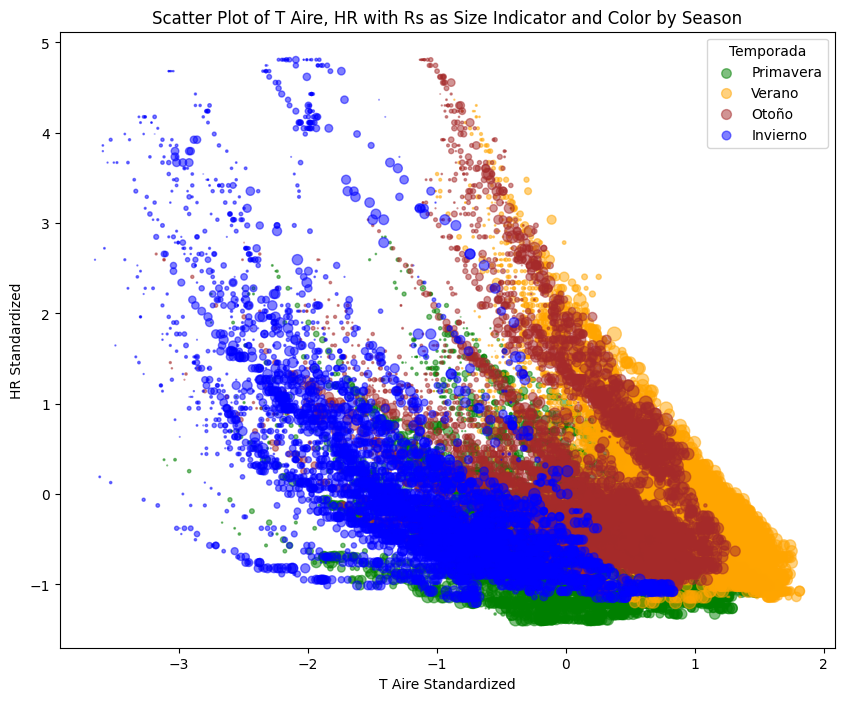

In [70]:
plt.figure(figsize=(10, 8))

# Assign different colors for each season
colors = {'Invierno': 'blue', 'Primavera': 'green', 'Verano': 'orange', 'Otoño': 'brown'}

# Scatter plot of T Aire, HR, and Rs with color indicating season
for season in norm_df['Temporada'].unique():
    subset = norm_df[norm_df['Temporada'] == season]
    plt.scatter(subset['T Aire (C)'], subset['HR (%)'], 
                alpha=0.5, label=season, c=colors[season], s=subset['Rs(w/m)'] * 100)

# Adding labels and legend
plt.xlabel('T Aire Standardized')
plt.ylabel('HR Standardized')
plt.title('Scatter Plot of T Aire, HR with Rs as Size Indicator and Color by Season')
plt.legend(title='Temporada')
plt.show()

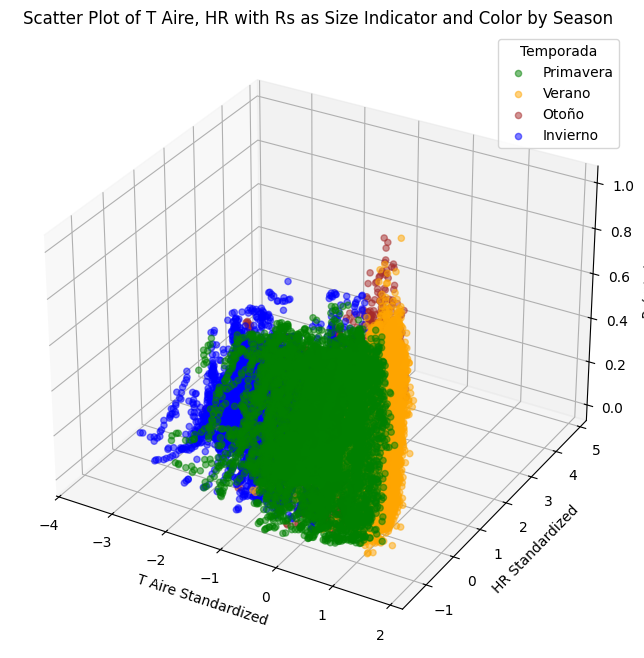

In [52]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")


# Assign different colors for each season
colors = {'Invierno': 'blue', 'Primavera': 'green', 'Verano': 'orange', 'Otoño': 'brown'}

# Scatter plot of T Aire, HR, and Rs with color indicating season
for season in norm_df['Temporada'].unique():
    subset = norm_df[norm_df['Temporada'] == season]
    ax.scatter(subset['T Aire (C)'], subset['HR (%)'], subset['Rs(w/m)'], 
                alpha=0.5, label=season, c=colors[season])

# Adding labels and legend
ax.set_xlabel('T Aire Standardized')
ax.set_ylabel('HR Standardized')
ax.set_zlabel("Rs(w/m)")
ax.set_title('Scatter Plot of T Aire, HR with Rs as Size Indicator and Color by Season')
ax.legend(title='Temporada')
plt.show()

In [72]:
import plotly.express as px

# Creamos la misma gráfica en plotly para tener una versión interactiva.
fig = px.scatter_3d(norm_df.sample(frac=0.1, random_state=614),
                    x="T Aire (C)",
                    y="HR (%)",
                    z="Rs(w/m)",
                    color="Temporada",
                    title="Gráfica 3D de la clasificación",
                    size="Rs(w/m)",
                    size_max=25)
fig.show(renderer="browser")

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Separamos las columnas que usaremos para predecir
features = ["T Aire (C)", "HR (%)", "Rs(w/m)"]

X = norm_df[features]
y = norm_df["Temporada"]

# Dividimos en conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=614)

# Entrenamos un modelo de clasificación (Forest)
model = RandomForestClassifier(random_state=614)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=614)

In [23]:
#Predicciones
y_pred = model.predict(X_test)

# Evaluamos
accuracy = accuracy_score(y_test, y_pred)
print(f"Presición: {accuracy:.2f}")
print(f"Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Presición: 0.75
Reporte de clasificación:
              precision    recall  f1-score   support

    Invierno       0.76      0.84      0.79       882
       Otoño       0.66      0.61      0.64       991
   Primavera       0.71      0.67      0.69      1287
      Verano       0.84      0.88      0.86      1356

    accuracy                           0.75      4516
   macro avg       0.74      0.75      0.74      4516
weighted avg       0.75      0.75      0.75      4516



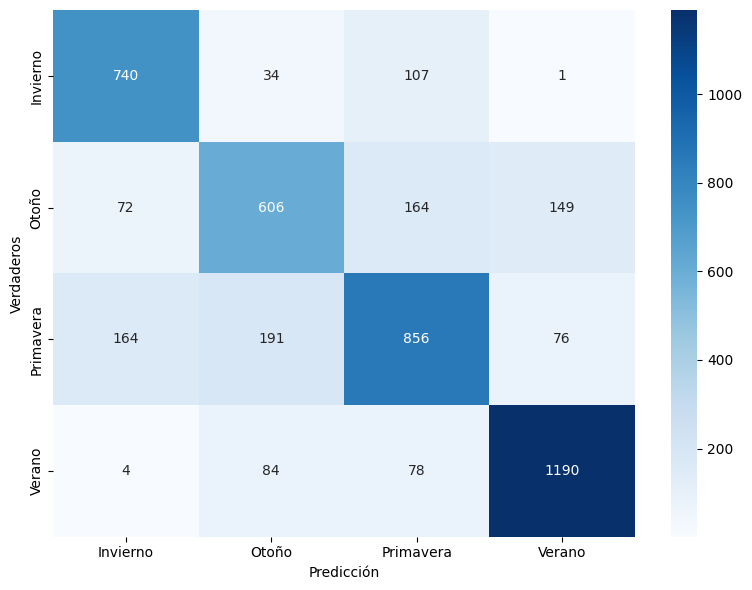

In [24]:
# Imprimimos la matríz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="g",
            xticklabels=norm_df["Temporada"].cat.categories,
            yticklabels=norm_df["Temporada"].cat.categories,
            )
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.tight_layout()
plt.show()

In [25]:
conf_mat

array([[ 740,   34,  107,    1],
       [  72,  606,  164,  149],
       [ 164,  191,  856,   76],
       [   4,   84,   78, 1190]])

In [26]:
# Importancia de los features
importances = model.feature_importances_

for feature, importance in zip(features, importances):
    print(f"{feature}, Importancia: {importance:.2f}")

T Aire (C), Importancia: 0.46
HR (%), Importancia: 0.25
Rs(w/m), Importancia: 0.29


In [27]:
# Comparemos ahora los datos reales con los predichos
df_preds = X_test.copy()
df_preds["Temporada_pred"] = y_pred
df_preds["Temporada"] = y_test
df_preds = df_preds.sample(frac=0.1, random_state=614)

# Crearemos una columna con las predicciones correctas e incorrectas.
df_preds["Correcto"] = np.where(df_preds["Temporada"] == df_preds["Temporada_pred"], True, False)

df_preds

,T Aire (C),HR (%),Rs(w/m),Temporada_pred,Temporada,Correcto
20282,-0.826392,-0.315371,0.222548,Primavera,Invierno,False
5095,0.219892,-0.694896,0.595900,Primavera,Verano,False
2059,1.010689,-1.074421,0.623719,Primavera,Primavera,True
12294,-0.619568,3.606386,0.295022,Otoño,Otoño,True
14025,1.071519,-0.821405,0.664714,Otoño,Otoño,True
...,...,...,...,...,...,...
4666,-0.619568,0.380424,0.024158,Primavera,Verano,False
21734,-0.047762,-0.694896,0.409956,Primavera,Primavera,True
6207,-0.449243,-0.188863,0.028551,Verano,Verano,True
5960,-0.461409,1.139474,0.049780,Primavera,Verano,False


In [28]:
df_preds["Correcto"].sum()

np.int64(340)

In [29]:
df_preds["Correcto"].sum() / df_preds.shape[0]

np.float64(0.7522123893805309)

In [30]:
# Create a DataFrame for easy plotting with Plotly showing actual and predicted
fig = px.scatter_3d(df_preds, 
                    x='T Aire (C)', 
                    y='HR (%)', 
                    z='Rs(w/m)', 
                    color='Temporada', 
                    symbol='Correcto', 
                    symbol_map={True: "circle", False: "x"},
                    title='Clasificación de temporada con 3 features.',
                    size='Rs(w/m)',
                    size_max=20,
                    )  # Reduce the size scaling of the points

# Show the plot
fig.update_layout(width=1000, height=800)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed